In [21]:
import glob, os, shutil
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Image classification model with very little data
- train small network from scratch (as baseline)
- use bottleneck features of pre-trained network
- fine-tune top layers of pre-trained network

Keras features to cover:
- fit_generator (for training Keras model using python data generators)
- ImageDataGenerator (for real-time data augmentation)
- layer freezing and model fine-tuning

Deep learning on small-data problems:
- deep learning requires learning features automatically from data, generally only possible when lots of training data is available esp where input samples are very high-dimensional like images
- but convolutional neural networks one of best models for "perceptual problems" such as image classification even with little data to learn from
- training convnets from scrath on small image dataset will still yield reasonable results
- deep learning models are highly repurposable - you can take an image classification trained on large-scale data then reuse it on significantly different problem
- many pre-trained models (usually trained on ImageNet dataset) can be use to bootstrap powerful vision models out of very little data 

## Data pre-processing and data augmentation 
- to make most of few training examples "augment" via random transformations so model never sees the same image twice
- helps prevent overfitting and model to generalize better

#### keras.processing.image.ImageDataGenerator class
- configure random transformations and normalization operations performed on image data during training
- instantiate generators of augmentated image batches (and their labels) via .flow(data, lables) or generators as inputs, fit_generator, evalute_generator and predict_generator

In [ ]:
#keras, scipy, pil installed
#NVIDIA GPU and cuDNN installed is optimal workflow but not neccessary with few images
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [4]:
datagen = ImageDataGenerator(
    
        #value range in degrees(0-180) to random rotate images
        rotation_range=40,
    
        #width_shift & height_shift are ranges (as fraction of total width or height)
        #within which to randomly translate
        width_shift_range=0.2,
        height_shift_range=0.2,
    
        #randomly applying shearing transformations
        shear_range=0.2,
    
        #randomly zooming inside pictures
        zoom_range=0.2,
    
        #randomly flips half of the images horizontally
        #relevant when no assumptions of horizontal assymetry - ie real-world pictures
        horizontal_flip=True,
    
        #strategy for filling newly created pixels
        fill_mode='nearest')

### rescale
- value by which you mulitply the data before any other processing
- original image RGB coefficients 0-255 but these values are too high for our models to process (given a typical learning rate) so target values between 0-1 by scalling with a 1/255 factor

## Generate images
- use datagen tool and save to temp folder to test out augmentation strategy

In [40]:
# this is a PIL image
img = load_img('/Users/VanessaG/Desktop/pizza_class_data/train/pizza/1312761.jpg') 

# this is a Numpy array with shape (3, 150, 150)
x = img_to_array(img) 

# this is a Numpy array with shape (1, 3, 150, 150)
x = x.reshape((1,) + x.shape)  

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='pizza', save_format='jpeg'):
    i += 1
    if i > 20:
        # otherwise the generator would loop indefinitely
        break  

In [43]:
pizza_transformed = [x for x in glob.glob('./preview/*') if x.endswith('.jpeg')]

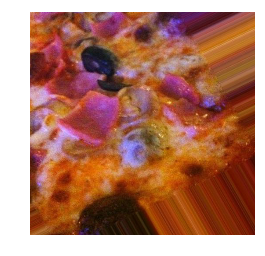

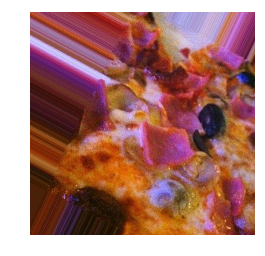

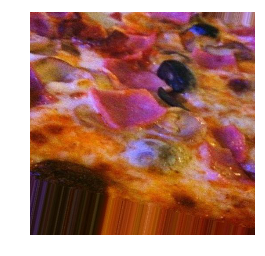

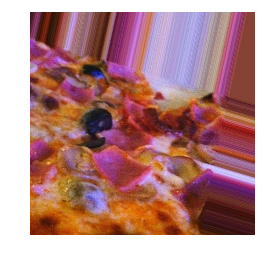

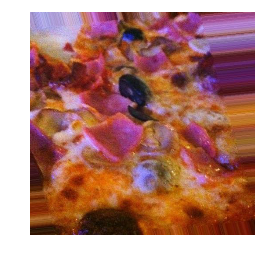

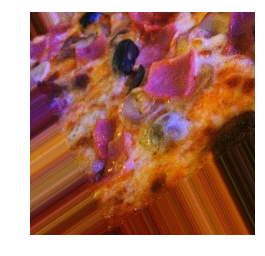

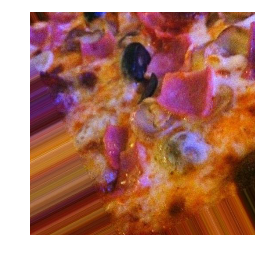

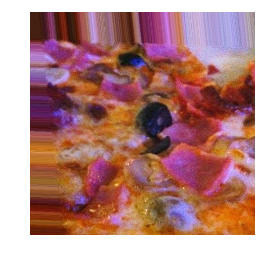

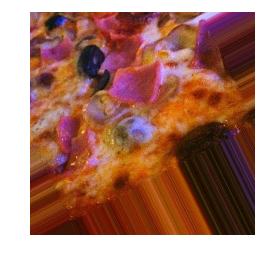

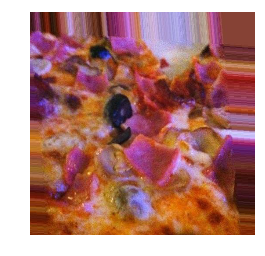

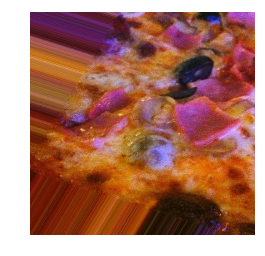

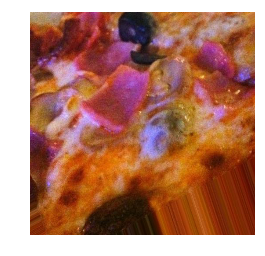

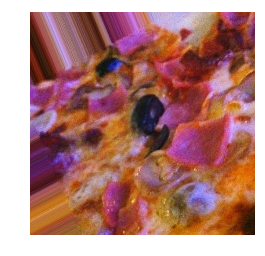

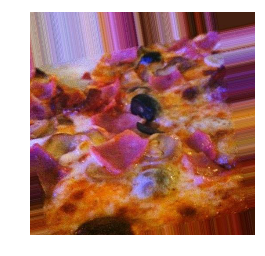

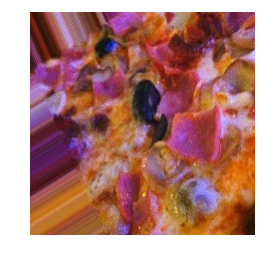

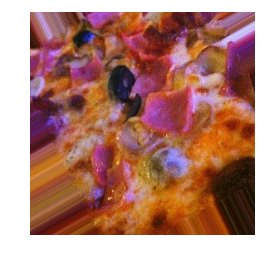

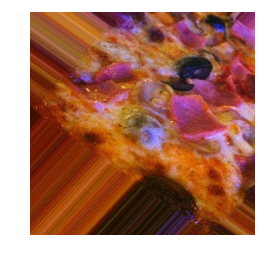

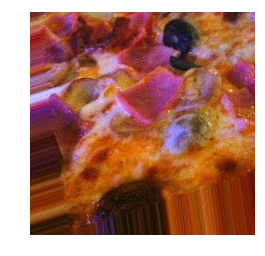

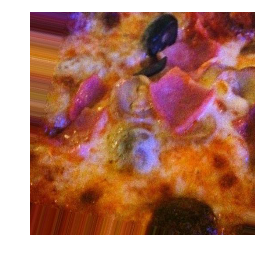

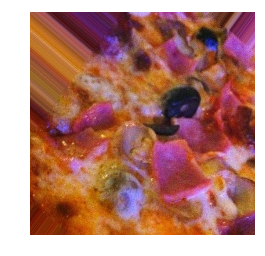

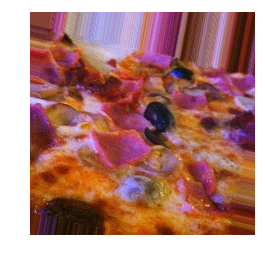

In [49]:
for img in pizza_transformed:
    image = load_img(img) 
    plt.axis("off")
    plt.imshow(image)
    plt.show()